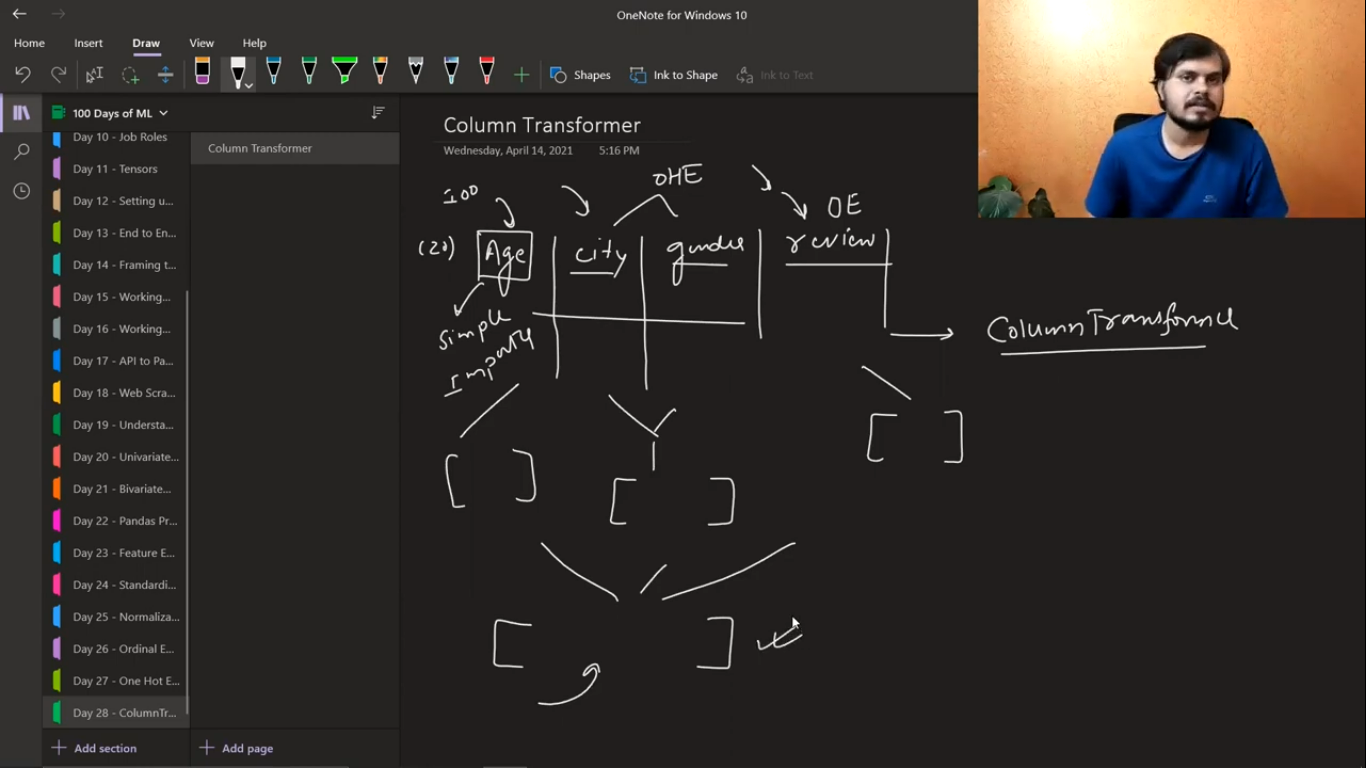

In [1]:
#when you have to apply different transformations on different columns & join them back
#instead use "column transformer" to do it all in 1 go

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.impute import SimpleImputer          #for missing values
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df = pd.read_csv('covid_toy.csv')

In [5]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [6]:
df['cough'].value_counts()

Mild      62
Strong    38
Name: cough, dtype: int64

In [7]:
df['city'].value_counts()

Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: city, dtype: int64

In [8]:
df['fever'].value_counts()

101.0    17
98.0     17
104.0    14
100.0    13
99.0     10
102.0    10
103.0     9
Name: fever, dtype: int64

In [9]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [10]:
#gender: OHE
#fever:simpleimputer
#cough:ordinal encoder
#city:OHE
#has_covid:labelencoder

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [12]:
X_train

,age,gender,fever,cough,city
65,69,Female,102.0,Mild,Bangalore
76,80,Male,100.0,Mild,Bangalore
82,24,Male,98.0,Mild,Kolkata
45,72,Male,99.0,Mild,Bangalore
48,66,Male,99.0,Strong,Bangalore
...,...,...,...,...,...
5,84,Female,NaN,Mild,Bangalore
0,60,Male,103.0,Mild,Kolkata
15,70,Male,103.0,Strong,Kolkata
84,69,Female,98.0,Strong,Mumbai


# aam zindagi (without using col transformer)

In [13]:
#simple imputer on fever column
#replacing missing value from data mean

si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [14]:
X_test_fever.shape

(20, 1)

In [15]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [16]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [17]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [18]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

# mentos zindagi (using column transformer)

In [19]:
from sklearn.compose import ColumnTransformer

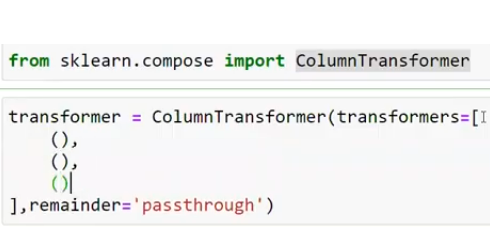

In [20]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [21]:
transformer.fit_transform(X_train)

array([[102.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  69.        ],
       [100.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  80.        ],
       [ 98.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  24.        ],
       [ 99.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  72.        ],
       [ 99.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  66.        ],
       [104.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  12.        ],
       [103.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  50.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  65.        ],
       [ 99.        ,   1.        ,   0.        ,   0.        ,
          1.    

In [22]:
transformer.fit_transform(X_train).shape

(80, 7)

In [23]:
transformer.transform(X_test).shape

(20, 7)